In [2]:
import tensorflow as tf

In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [4]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2956 - accuracy: 0.9150 - val_loss: 0.1451 - val_accuracy: 0.9571
Epoch 2/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1411 - accuracy: 0.9576 - val_loss: 0.1006 - val_accuracy: 0.9679
Epoch 3/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.1058 - accuracy: 0.9683 - val_loss: 0.0863 - val_accuracy: 0.9742
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0847 - accuracy: 0.9734 - val_loss: 0.0770 - val_accuracy: 0.9736
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0741 - accuracy: 0.9769 - val_loss: 0.0791 - val_accuracy: 0.9753
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0657 - accuracy: 0.9791 - val_loss: 0.0700 - val_accuracy: 0.9785
Epoch 7/10
60000/60000 [==============================] 

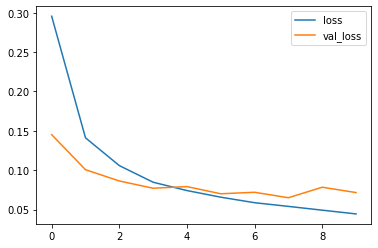

In [7]:
# Plot accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

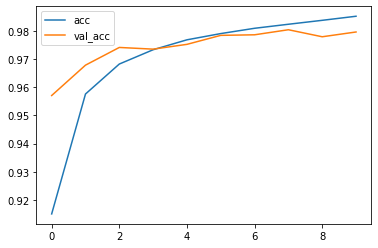

In [8]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.07154749080876355, 0.9797]


In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

Confusion matrix, without normalization
[[ 971    0    0    2    0    2    3    1    1    0]
 [   0 1122    3    2    0    0    2    2    4    0]
 [   3    1 1017    1    1    0    2    2    4    1]
 [   0    0    4  998    0    2    0    3    2    1]
 [   2    0    4    0  964    0    4    2    0    6]
 [   2    0    0   15    1  868    2    0    3    1]
 [   4    2    0    1    3    6  940    0    2    0]
 [   2    4   14    2    0    0    0  997    2    7]
 [   5    1    2    7    4    4    3    3  942    3]
 [   1    3    0    7   10    2    0    5    3  978]]


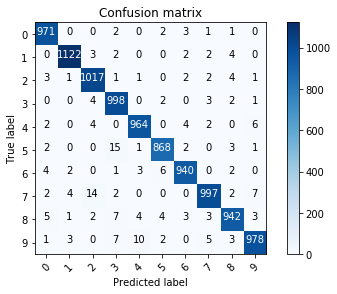

In [14]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt. imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))
    

Text(0.5, 1.0, 'True label: 8 Predicted: 7')

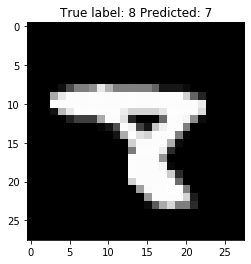

In [15]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))